In [21]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import psycopg2 as pg

In [22]:
engine = pg.connect("dbname='postgres' user='postgres' host='database-final.cjdbapst3wjf.us-east-1.rds.amazonaws.com' port='5432' password='FinalProject05'")
Contributions = pd.read_sql('select * from merged_2009', con=engine)
Contributions.head()
Contributions.dropna()

,election,candidateid,candidatename,date,contributiontype,city,state,zipcode,amount,matchamt,prevamt,totalamount,expenditure_amount,purposecode,purpose
0,2009,260,"William,Thompson, Jr.",2009-09-11,Corporation,New York,NY,10007.0,0.0,0,0.0,0.0,38,Other,Other: explntion
1,2009,260,"William,Thompson, Jr.",2007-06-14,Corporation,New York,NY,10007.0,0.0,0,0.0,0.0,49,Other,Other: explntion
2,2009,1286,"Kevin,Coenen",2009-03-16,Limited Liability Company,New York,NY,10106.0,0.0,0,0.0,0.0,30,Other,Other: explntion
3,2009,1286,"Kevin,Coenen",2009-03-23,Limited Liability Company,New York,NY,10106.0,0.0,0,0.0,0.0,30,Other,Other: explntion
5,2009,260,"William,Thompson, Jr.",2008-03-06,Corporation,New York,NY,10022.0,0.0,0,0.0,0.0,962,Fundraising,Fundraising
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,2009,605,"Michael,Bloomberg",2009-12-23,Individual,New York,NY,10028.0,0.0,0,0.0,0.0,12750,Campaign Workers Salaries,Campgn Wrkrs $$
9708,2009,605,"Michael,Bloomberg",2009-07-15,Individual,New York,NY,10028.0,0.0,0,0.0,0.0,3750,Campaign Workers Salaries,Campgn Wrkrs $$
9709,2009,605,"Michael,Bloomberg",2009-10-29,Individual,New York,NY,10028.0,0.0,0,0.0,0.0,3750,Campaign Workers Salaries,Campgn Wrkrs $$
9710,2009,605,"Michael,Bloomberg",2009-11-16,Corporation,Brooklyn,NY,11208.0,0.0,0,0.0,0.0,375,Other,Other: explntion


In [23]:
Contributions_df = Contributions.drop(columns=['election','prevamt'])
total_groupby = Contributions_df.groupby(['candidatename']).sum(['totalamount']).sort_values('totalamount',ascending=False)
total_groupby

,zipcode,amount,matchamt,totalamount,expenditure_amount
candidatename,,,,,
"Bloomberg, Michael R",906750.0,1.083750e+08,0,4.405665e+09,0
"Thompson, Jr., William C",132621702.0,5.207114e+06,521826,6.643962e+06,0
"Avella, Tony",24149519.0,3.687483e+05,83490,6.209483e+05,0
"Catsimatidis, John A",90585.0,2.966792e+05,0,5.316792e+05,0
"Talen, Billy",27803914.0,4.701800e+04,19324,7.414900e+04,0
"Villar, Francisca",540598.0,9.463360e+03,0,1.151336e+04,0
"Burck, Robert J",15430508.0,9.519750e+03,0,1.072451e+04,0
"Rogers, Roland C",305303.0,6.083000e+03,0,6.728000e+03,0
"Coenen, Jr., Kevin P",47068.0,6.218000e+02,0,6.218000e+02,0


In [24]:
Contributions_df = Contributions_df.groupby(['zipcode','date','contributiontype','city','state']).sum('totalamount')

In [25]:
Contributions_df.head()

,,,,,amount,matchamt,totalamount,expenditure_amount
zipcode,date,contributiontype,city,state,,,,
901.0,2009-07-31,Individual,sj,PA,15.0,0,15.0,0
936.0,2009-02-20,Individual,San Juan,PR,250.0,0,250.0,0
1020.0,2009-07-06,Corporation,Chicopee,MA,0.0,0,0.0,103
1027.0,2008-09-06,Individual,East Hampton,MA,99.0,0,99.0,0
1030.0,2009-07-29,Individual,Feeding Hills,MA,25.0,0,25.0,0


In [26]:
Contributions_df = Contributions_df.reset_index()
Contributions_df

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,901.0,2009-07-31,Individual,sj,PA,15.0,0,15.0,0
1,936.0,2009-02-20,Individual,San Juan,PR,250.0,0,250.0,0
2,1020.0,2009-07-06,Corporation,Chicopee,MA,0.0,0,0.0,103
3,1027.0,2008-09-06,Individual,East Hampton,MA,99.0,0,99.0,0
4,1030.0,2009-07-29,Individual,Feeding Hills,MA,25.0,0,25.0,0
...,...,...,...,...,...,...,...,...,...
15254,98499.0,2009-10-27,Individual,Lakewood,WA,100.0,0,100.0,0
15255,98512.0,2009-08-31,Individual,olympia,WA,15.0,0,15.0,0
15256,98535.0,2007-07-09,Individual,Sacramento,CA,3500.0,0,3500.0,0
15257,98535.0,2007-12-15,Individual,Sacramento,CA,0.0,0,3500.0,0


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
Contributions_df_enc = Contributions_df.copy()
le = LabelEncoder()
Contributions_df_enc['date'] = le.fit_transform(Contributions_df['date'])
Contributions_df_enc['contributiontype'] = le.fit_transform(Contributions_df['contributiontype'])
Contributions_df_enc['city'] = le.fit_transform(Contributions_df['city'])
# Contributions_df_enc['Amount'] = le.fit_transform(Contributions_df['Amount'])
Contributions_df_enc['state'] = le.fit_transform(Contributions_df['state'])
Contributions_df_enc['zipcode'] = le.fit_transform(Contributions_df['zipcode'])
# Contributions_df_enc['MatchAmt'] = le.fit_transform(Contributions_df['MatchAmt'])
# Contributions_df_enc[features] = scaler.fit_transform(Contributions_df_enc[features])
Contributions_df_enc.head()

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,0,692,4,1327,39,15.0,0,15.0,0
1,1,544,4,824,40,250.0,0,250.0,0
2,2,667,3,164,19,0.0,0,0.0,103
3,3,446,4,245,19,99.0,0,99.0,0
4,4,690,4,291,19,25.0,0,25.0,0


In [28]:
X = Contributions_df_enc.drop('totalamount',axis = 1)
y = Contributions_df_enc['totalamount']
Contributions_df_enc.nunique()

zipcode               1647
date                   836
contributiontype        11
city                  1388
state                   54
amount                 522
matchamt               273
totalamount            788
expenditure_amount    2651
dtype: int64

In [29]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=79)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [31]:
regr = RandomForestRegressor()

In [32]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_pred = regr.predict(X_test)
print(len(y_pred))

4578


In [34]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

0.9245504321254148


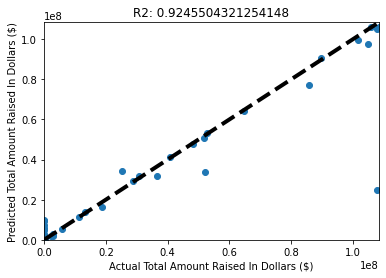

In [36]:
# %matplotlib inline
print(r_squared)
# fig, ax = plt.subplots()
# ax.scatter(y_test,y_pred)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Actual Total Amount Raised In Dollars ($)')
# ax.set_ylabel('Predicted Total Amount Raised In Dollars ($)')
# ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.scatter(y_test,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Total Amount Raised In Dollars ($)')
plt.ylabel('Predicted Total Amount Raised In Dollars ($)')
plt.title('R2: ' + str(r2_score(y_test, y_pred)))
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.savefig('../Resources/Predicted_Total_Amount_Regression_2005.png')

In [37]:
pred_df = X_test
pred_df['Predicted Total Amount'] = y_pred
# pred_df.groupby('ZipCode').sum('Predicted Total Amount').head()

/Users/Abir/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
pred_df.isnull().sum()

zipcode                   0
date                      0
contributiontype          0
city                      0
state                     0
amount                    0
matchamt                  0
expenditure_amount        0
Predicted Total Amount    0
dtype: int64

In [39]:
pred_graph = pred_df.groupby('zipcode').sum('redicted Total Amount').sort_values(by=['Predicted Total Amount'],ascending=True)

In [40]:
# pred_graph = pred_graph.reset_index()
pred_graph

,date,contributiontype,city,state,amount,matchamt,expenditure_amount,Predicted Total Amount
zipcode,,,,,,,,
1487,498,3,491,4,0.00,0,536,0.000000e+00
1483,1471,6,982,8,0.00,0,134,0.000000e+00
1469,552,3,920,34,0.00,0,1348,0.000000e+00
1110,576,3,419,11,0.00,0,2554,0.000000e+00
1114,718,3,32,11,0.00,0,75,0.000000e+00
...,...,...,...,...,...,...,...,...
400,5201,22,6190,350,44787.59,550,9064,5.024442e+06
381,24976,151,22993,1330,17874.75,2999,30586,6.017373e+06
1010,14115,60,19580,140,0.00,0,10573377,9.707400e+06
